In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.model_selection as cv
import sklearn.feature_selection as feat
import sklearn.preprocessing as Pre
import sklearn.tree as Tree
import sklearn.ensemble as Ens
import sklearn.metrics as m

import warnings
warnings.filterwarnings('ignore')

# Meta-learning methods

In [2]:
data = pd.read_csv('../datasets/preprocessed/train.csv', sep=',', na_values="NA").drop(columns='Id')

In [3]:
data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,Fence,MiscVal,SaleType,SaleCondition,SalePrice,MasVnr,SecondFloor,Baths,Porch,Pool
0,G,RH,0.185945,1.0,Lvl,Inside,Edwards,Artery,1Fam,2Story,...,0.0,0.0,WD,Normal,Level2,0.0,1.0,0.4,True,0.0
1,A,RL,0.198890,1.0,Lvl,Inside,NAmes,Norm,1Fam,1Story,...,1.0,0.0,WD,Family,Level2,1.0,0.0,0.0,True,0.0
2,L,RL,0.260616,1.0,Lvl,Corner,NridgHt,Norm,Twnhs,1Story,...,0.0,0.0,New,Partial,Level4,1.0,0.0,0.4,True,0.0
3,A,RL,0.251230,1.0,Lvl,Inside,NAmes,Norm,1Fam,1Story,...,1.0,0.0,WD,Abnorml,Level1,1.0,0.0,0.0,False,0.0
4,E,RL,0.174186,1.0,Lvl,Inside,SWISU,Norm,1Fam,1.5Fin,...,0.0,0.0,WD,Normal,Level2,0.0,1.0,0.4,True,0.0


In [4]:
kfold = cv.StratifiedKFold(n_splits=10, random_state=1) 

In [5]:
X = data.drop(columns='SalePrice')
Y = data.loc[:,'SalePrice']

le = Pre.LabelEncoder()
le.fit(Y)
Y = le.fit_transform(Y)
i = 0
for t in X.dtypes:
    if t == object or t == bool:
        le.fit(X.iloc[:,i])
        X.iloc[:,i] = le.fit_transform(X.iloc[:,i])
    i += 1

X_train, X_test, y_train, y_test = cv.train_test_split(X, Y, test_size=.3, random_state=1)

## Bagging

In [6]:
bg = Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(), random_state=0).fit(X_train, y_train)
bg.score(X_test,y_test)

0.804635761589404

In [7]:
cvs = cv.cross_val_score(Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(), random_state=0),
                         X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.808148893360161

In [8]:
pred=bg.predict(X_test)

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

[[ 13  10   0   0   0]
 [  9 182   9   0   0]
 [  0  20  40   2   0]
 [  0   0   6   6   0]
 [  0   0   0   3   2]]
0.804635761589404
              precision    recall  f1-score   support

           0       0.59      0.57      0.58        23
           1       0.86      0.91      0.88       200
           2       0.73      0.65      0.68        62
           3       0.55      0.50      0.52        12
           4       1.00      0.40      0.57         5

    accuracy                           0.80       302
   macro avg       0.74      0.60      0.65       302
weighted avg       0.80      0.80      0.80       302



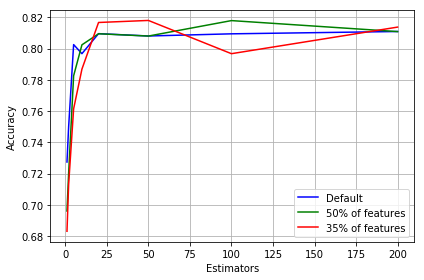

In [9]:
lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(),n_estimators=nest), X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb2=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(),n_estimators=nest,max_features=0.35), X_train, y_train, cv=kfold, scoring='accuracy')
    lb2.append(scores.mean())

lb3=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(),n_estimators=nest,max_features=0.5), X_train, y_train, cv=kfold, scoring='accuracy')
    lb3.append(scores.mean())

plt.plot([1,2,5,10,20,50,100,200],lb,'b',label='Default')
plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='50% of features')
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='35% of features')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

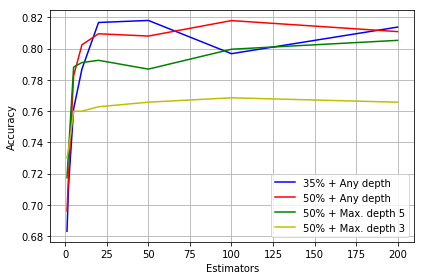

In [10]:
plt.plot([1,2,5,10,20,50,100,200],lb2,'b',label='35% + Any depth')
plt.plot([1,2,5,10,20,50,100,200],lb3,'r',label='50% + Any depth')

lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(max_depth=3),n_estimators=nest,max_features=0.5), X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb4=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(max_depth=5),n_estimators=nest,max_features=0.5), X_train, y_train, cv=kfold, scoring='accuracy')
    lb4.append(scores.mean())



plt.plot([1,2,5,10,20,50,100,200],lb4,'g',label='50% + Max. depth 5')
plt.plot([1,2,5,10,20,50,100,200],lb,'y',label='50% + Max. depth 3')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

In [11]:
bestbg = Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(),
                               n_estimators=[1,2,5,10,20,50,100,200][np.argmax(lb4)],
                               max_features=0.35)

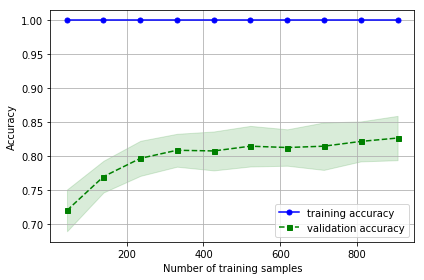

In [12]:
train_sizes, train_scores, test_scores =\
                cv.learning_curve(estimator=bestbg,
                               X=X,
                               y=Y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

## Random Forests

In [13]:
rfc = Ens.RandomForestClassifier().fit(X_train, y_train)
rfc.score(X_test,y_test)

0.8642384105960265

In [14]:
cvs = cv.cross_val_score(Ens.RandomForestClassifier(),X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.8280281690140845

In [15]:
pred=rfc.predict(X_test)
print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

[[ 11  12   0   0   0]
 [  3 192   5   0   0]
 [  0  14  48   0   0]
 [  0   0   3   9   0]
 [  0   0   0   4   1]]
0.8642384105960265
              precision    recall  f1-score   support

           0       0.79      0.48      0.59        23
           1       0.88      0.96      0.92       200
           2       0.86      0.77      0.81        62
           3       0.69      0.75      0.72        12
           4       1.00      0.20      0.33         5

    accuracy                           0.86       302
   macro avg       0.84      0.63      0.68       302
weighted avg       0.86      0.86      0.85       302



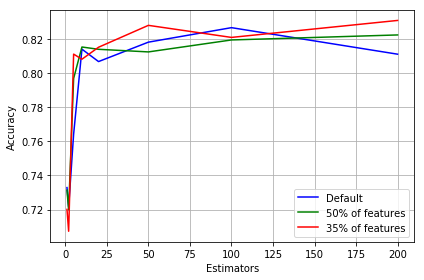

In [16]:
lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.RandomForestClassifier(n_estimators=nest), X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb2=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.RandomForestClassifier(n_estimators=nest, max_features=0.35), X_train, y_train, cv=kfold, scoring='accuracy')
    lb2.append(scores.mean())

lb3=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.RandomForestClassifier(n_estimators=nest, max_features=0.5), X_train, y_train, cv=kfold, scoring='accuracy')
    lb3.append(scores.mean())

plt.plot([1,2,5,10,20,50,100,200],lb,'b',label='Default')
plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='50% of features')
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='35% of features')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

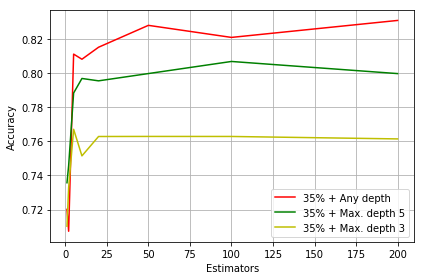

In [17]:
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='35% + Any depth')

lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.RandomForestClassifier(n_estimators=nest,
                                                           max_features=0.35,
                                                           max_depth=3),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb3=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.RandomForestClassifier(n_estimators=nest,
                                                           max_features=0.35,
                                                           max_depth=5),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb3.append(scores.mean())
    
plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='35% + Max. depth 5')
plt.plot([1,2,5,10,20,50,100,200],lb,'y',label='35% + Max. depth 3')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

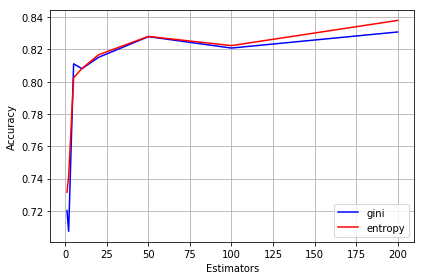

In [18]:
lb=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.RandomForestClassifier(n_estimators=nest,
                                                           criterion='entropy',
                                                           max_features=0.35),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())
    
plt.plot([1,2,5,10,20,50,100,200],lb2,'b',label='gini')
plt.plot([1,2,5,10,20,50,100,200],lb,'r',label='entropy')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

In [19]:
bestrf = Ens.RandomForestClassifier(n_estimators=[1,2,5,10,20,50,100,200][np.argmax(lb)],
                                    criterion='entropy',
                                    max_features=0.35)

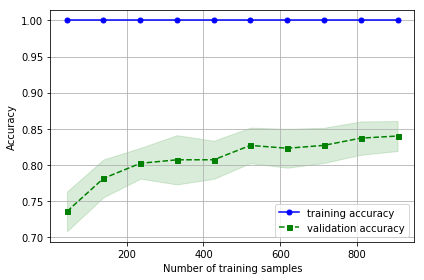

In [20]:
train_sizes, train_scores, test_scores =\
                cv.learning_curve(bestrf,
                               X=X,
                               y=Y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

In [21]:
rfc = bestrf
rfc = rfc.fit(X, Y)
print(rfc.feature_importances_)  

[1.45699880e-02 5.63574827e-03 5.11824686e-02 4.81084159e-03
 4.64645734e-03 5.02594221e-03 2.63330403e-02 2.81525930e-03
 2.97604338e-03 6.00564292e-03 1.53715063e-01 4.60860983e-02
 6.04456993e-03 3.10806125e-04 1.42453079e-02 5.06323843e-02
 5.74635244e-03 2.34058105e-02 3.11584132e-03 7.71214705e-03
 1.08495472e-01 6.58818991e-03 2.04208326e-02 1.92093503e-01
 8.65245213e-03 1.98384784e-03 3.55705612e-02 2.18393644e-02
 1.64258175e-03 9.88303715e-03 7.26864982e-03 9.25483866e-03
 8.23358285e-03 6.55612358e-02 4.20182936e-03 3.17837904e-03
 2.40913798e-03 1.89776556e-03 1.11950430e-03 5.01959445e-03
 1.37865582e-02 3.84661581e-03 2.96188950e-03 2.63378795e-02
 2.73027411e-03 6.61033309e-06]


In [22]:
model = feat.SelectFromModel(rfc, prefit=True, threshold=0.05)
X_new = model.transform(X)
print(X_new.shape)

print(np.mean(cv.cross_val_score(rfc, X=X, y=Y, cv=kfold, scoring='accuracy')))
print(np.mean(cv.cross_val_score(rfc, X=X_new, y=Y, cv=kfold, scoring='accuracy')))

(1006, 6)
0.8370000000000001
0.8111782178217821


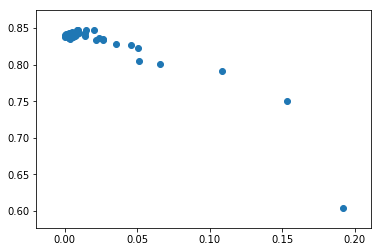

Best threshold:  0.014569988043543203


In [23]:
thresholds=rfc.feature_importances_

l=[]
for threshold in thresholds:
    model = feat.SelectFromModel(rfc, prefit=True, threshold=threshold)
    X_new = model.transform(X)
    acc = np.mean(cv.cross_val_score(rfc, X=X_new, y=Y, cv=kfold, scoring='accuracy'))
    l.append(acc)
    
plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])

In [24]:
model = feat.SelectFromModel(rfc, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X)

In [25]:
X_train2, X_test2, y_train2, y_test2 = cv.train_test_split(X_new, Y, test_size=.3, random_state=1)

In [26]:
rfc = bestrf.fit(X_train2, y_train2)
rfc.score(X_test2,y_test2)

0.8576158940397351

## Extra Trees


In [82]:
etc = Ens.ExtraTreesClassifier().fit(X_train, y_train)
etc.score(X_test,y_test)

0.8311258278145696

In [85]:
cvs = cv.cross_val_score(Ens.ExtraTreesClassifier(),X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.8011267605633803

In [86]:
pred = etc.predict(X_test)

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

[[ 11  12   0   0   0]
 [  4 187   9   0   0]
 [  0  20  42   0   0]
 [  0   0   2   9   1]
 [  0   0   0   3   2]]
0.8311258278145696
              precision    recall  f1-score   support

           0       0.73      0.48      0.58        23
           1       0.85      0.94      0.89       200
           2       0.79      0.68      0.73        62
           3       0.75      0.75      0.75        12
           4       0.67      0.40      0.50         5

    accuracy                           0.83       302
   macro avg       0.76      0.65      0.69       302
weighted avg       0.82      0.83      0.82       302



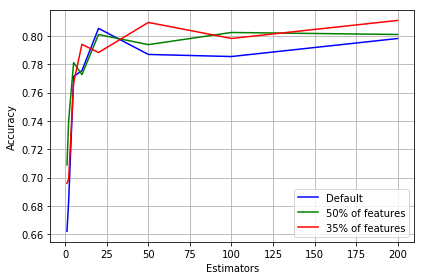

In [87]:
lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.ExtraTreesClassifier(n_estimators=nest),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb2=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.ExtraTreesClassifier(n_estimators=nest,
                                                         max_features=0.35),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb2.append(scores.mean())

lb3=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.ExtraTreesClassifier(n_estimators=nest,
                                                           max_features=0.5),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb3.append(scores.mean())

plt.plot([1,2,5,10,20,50,100,200],lb,'b',label='Default')
plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='50% of features')
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='35% of features')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

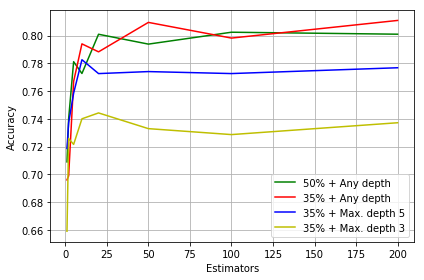

In [88]:
plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='50% + Any depth')
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='35% + Any depth')

lb=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.ExtraTreesClassifier(n_estimators=nest,
                                                         max_depth=3,
                                                         max_features=0.35),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb4=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.ExtraTreesClassifier(n_estimators=nest,
                                                         max_depth=5,
                                                         max_features=0.35),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb4.append(scores.mean())

    
plt.plot([1,2,5,10,20,50,100,200],lb4,'b',label='35% + Max. depth 5')
plt.plot([1,2,5,10,20,50,100,200],lb,'y',label='35% + Max. depth 3')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

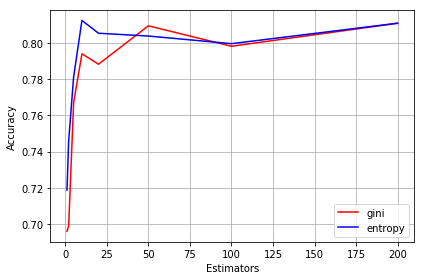

In [89]:
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='gini')
lb5=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.ExtraTreesClassifier(n_estimators=nest,
                                                           criterion='entropy',
                                                           max_features=0.35),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb5.append(scores.mean())
    
plt.plot([1,2,5,10,20,50,100,200],lb5,'b',label='entropy')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

In [90]:
bestet = Ens.ExtraTreesClassifier(n_estimators=[1,2,5,10,20,50,100,200][np.argmax(lb5)],
                                    criterion='entropy',
                                    max_features=0.35)

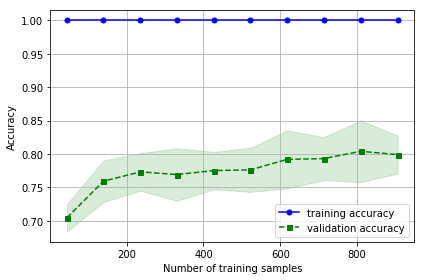

In [91]:
train_sizes, train_scores, test_scores =\
                cv.learning_curve(estimator=bestet,
                                  X=X,
                                  y=Y,
                                  train_sizes=np.linspace(0.05, 1.0, 10),
                                  cv=10,
                                  n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

## AdaBoost

In [38]:
adb = Ens.AdaBoostClassifier().fit(X_train, y_train)
adb.score(X_test,y_test)

0.4900662251655629

In [39]:
cvs = cv.cross_val_score(Ens.AdaBoostClassifier(),X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.5498390342052314

In [40]:
pred = adb.predict(X_test)

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

[[17  6  0  0  0]
 [71 85 44  0  0]
 [ 6 10 46  0  0]
 [ 0  0 12  0  0]
 [ 0  0  5  0  0]]
0.4900662251655629
              precision    recall  f1-score   support

           0       0.18      0.74      0.29        23
           1       0.84      0.42      0.56       200
           2       0.43      0.74      0.54        62
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         5

    accuracy                           0.49       302
   macro avg       0.29      0.38      0.28       302
weighted avg       0.66      0.49      0.51       302



In [41]:
adb = Ens.AdaBoostClassifier(base_estimator=Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(max_depth=1),
                                                             random_state=0)).fit(X_train, y_train)
adb.score(X_test,y_test)

0.7781456953642384

In [42]:
cvs = cv.cross_val_score(Ens.AdaBoostClassifier(base_estimator=
                                                Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(max_depth=1),
                                                                                     random_state=0)),
                         X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.7145875251509055

In [44]:
pred = adb.predict(X_test)

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

[[  0  23   0   0   0]
 [  0 172  28   0   0]
 [  0   6  56   0   0]
 [  0   0   5   7   0]
 [  0   0   0   5   0]]
0.7781456953642384
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.86      0.86      0.86       200
           2       0.63      0.90      0.74        62
           3       0.58      0.58      0.58        12
           4       0.00      0.00      0.00         5

    accuracy                           0.78       302
   macro avg       0.41      0.47      0.44       302
weighted avg       0.72      0.78      0.74       302



In [45]:
adb = Ens.AdaBoostClassifier(base_estimator=Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(),
                                                             random_state=0)).fit(X_train, y_train)
adb.score(X_test,y_test)

0.8774834437086093

In [46]:
cvs = cv.cross_val_score(Ens.AdaBoostClassifier(base_estimator=
                                                Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(),
                                                                      random_state=0)),
                         X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.828148893360161

In [47]:
pred = adb.predict(X_test)

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

[[ 12  11   0   0   0]
 [  1 192   7   0   0]
 [  0   9  53   0   0]
 [  0   0   5   7   0]
 [  0   0   0   4   1]]
0.8774834437086093
              precision    recall  f1-score   support

           0       0.92      0.52      0.67        23
           1       0.91      0.96      0.93       200
           2       0.82      0.85      0.83        62
           3       0.64      0.58      0.61        12
           4       1.00      0.20      0.33         5

    accuracy                           0.88       302
   macro avg       0.86      0.62      0.68       302
weighted avg       0.88      0.88      0.87       302



In [48]:
adb = Ens.AdaBoostClassifier(Ens.RandomForestClassifier()).fit(X_train, y_train)
adb.score(X_test,y_test)

0.8443708609271523

In [49]:
cvs = cv.cross_val_score(Ens.AdaBoostClassifier(Ens.RandomForestClassifier()),X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.8152917505030182

In [50]:
pred = adb.predict(X_test)

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

[[ 12  11   0   0   0]
 [  3 191   6   0   0]
 [  0  18  44   0   0]
 [  0   0   5   7   0]
 [  0   0   0   4   1]]
0.8443708609271523
              precision    recall  f1-score   support

           0       0.80      0.52      0.63        23
           1       0.87      0.95      0.91       200
           2       0.80      0.71      0.75        62
           3       0.64      0.58      0.61        12
           4       1.00      0.20      0.33         5

    accuracy                           0.84       302
   macro avg       0.82      0.59      0.65       302
weighted avg       0.84      0.84      0.83       302



In [51]:
adb = Ens.AdaBoostClassifier(Ens.ExtraTreesClassifier()).fit(X_train, y_train)
adb.score(X_test,y_test)

0.847682119205298

In [52]:
cvs = cv.cross_val_score(Ens.AdaBoostClassifier(Ens.ExtraTreesClassifier()),X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.7996780684104629

In [53]:
pred = adb.predict(X_test)

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

[[ 11  12   0   0   0]
 [  2 192   6   0   0]
 [  0  19  42   1   0]
 [  0   0   2   9   1]
 [  0   0   0   3   2]]
0.847682119205298
              precision    recall  f1-score   support

           0       0.85      0.48      0.61        23
           1       0.86      0.96      0.91       200
           2       0.84      0.68      0.75        62
           3       0.69      0.75      0.72        12
           4       0.67      0.40      0.50         5

    accuracy                           0.85       302
   macro avg       0.78      0.65      0.70       302
weighted avg       0.85      0.85      0.84       302



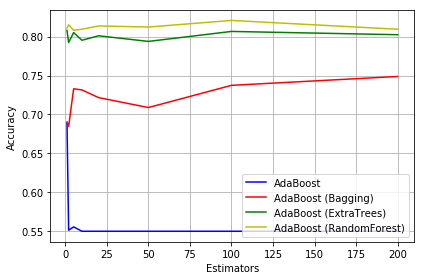

In [56]:
lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.AdaBoostClassifier(n_estimators=nest),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb2=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.AdaBoostClassifier(n_estimators=nest,
                                                       base_estimator=Ens.BaggingClassifier(base_estimator=Tree.DecisionTreeClassifier(max_depth=1),
                                                                                            random_state=0)),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb2.append(scores.mean())

lb3=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.AdaBoostClassifier(n_estimators=nest,
                                                       base_estimator=Ens.ExtraTreesClassifier()),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb3.append(scores.mean())

lb4=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.AdaBoostClassifier(n_estimators=nest,
                                                       base_estimator=Ens.RandomForestClassifier()),
                                X_train, y_train, cv=kfold, scoring='accuracy')
    lb4.append(scores.mean())
    
    
    
plt.plot([1,2,5,10,20,50,100,200],lb,'b',label='AdaBoost')
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='AdaBoost (Bagging)')
plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='AdaBoost (ExtraTrees)')
plt.plot([1,2,5,10,20,50,100,200],lb4,'y',label='AdaBoost (RandomForest)')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

In [59]:
bestab = Ens.AdaBoostClassifier(n_estimators=[1,2,5,10,20,50,100,200][np.argmax(lb)])
bestab2 = Ens.AdaBoostClassifier(n_estimators=[1,2,5,10,20,50,100,200][np.argmax(lb4)],
                                                       base_estimator=Ens.RandomForestClassifier())

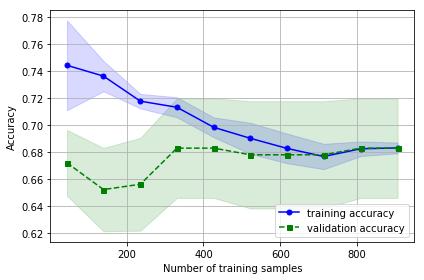

In [60]:
train_sizes, train_scores, test_scores =\
                cv.learning_curve(estimator=bestab,
                               X=X,
                               y=Y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

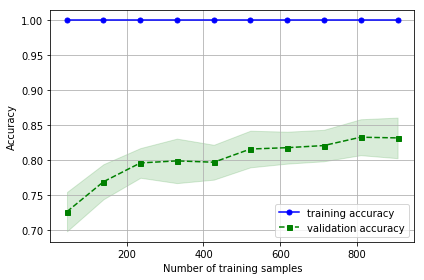

In [61]:
train_sizes, train_scores, test_scores =\
                cv.learning_curve(estimator=bestab2,
                               X=X,
                               y=Y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

## Gradient Tree Boosting

In [62]:
gbc = Ens.GradientBoostingClassifier().fit(X_train, y_train)
gbc.score(X_test,y_test)

0.847682119205298

In [63]:
cvs = cv.cross_val_score(gbc,X=X_train,y=y_train,cv=kfold)
np.mean(cvs)

0.8166599597585513

In [64]:
pred = gbc.predict(X_test)

print(m.confusion_matrix(y_test, pred))
print(m.accuracy_score(y_test, pred))
print(m.classification_report(y_test, pred))

[[ 12  11   0   0   0]
 [  2 186  12   0   0]
 [  0  13  48   1   0]
 [  0   0   5   7   0]
 [  0   0   1   1   3]]
0.847682119205298
              precision    recall  f1-score   support

           0       0.86      0.52      0.65        23
           1       0.89      0.93      0.91       200
           2       0.73      0.77      0.75        62
           3       0.78      0.58      0.67        12
           4       1.00      0.60      0.75         5

    accuracy                           0.85       302
   macro avg       0.85      0.68      0.74       302
weighted avg       0.85      0.85      0.84       302



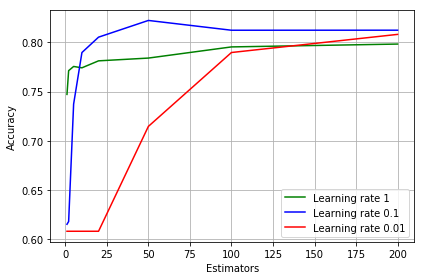

In [65]:
lb=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.GradientBoostingClassifier(n_estimators=nest), X_train, y_train, cv=kfold, scoring='accuracy')
    lb.append(scores.mean())

lb2=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.GradientBoostingClassifier(n_estimators=nest, learning_rate=0.01), X_train, y_train, cv=kfold, scoring='accuracy')
    lb2.append(scores.mean())

lb3=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.GradientBoostingClassifier(n_estimators=nest, learning_rate=1), X_train, y_train, cv=kfold, scoring='accuracy')
    lb3.append(scores.mean())

plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='Learning rate 1')
plt.plot([1,2,5,10,20,50,100,200],lb,'b',label='Learning rate 0.1')
plt.plot([1,2,5,10,20,50,100,200],lb2,'r',label='Learning rate 0.01')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

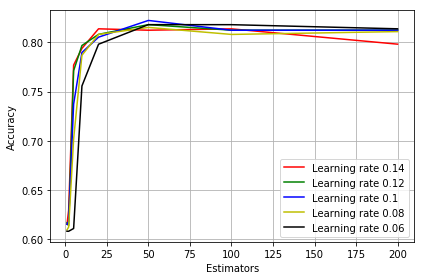

In [67]:
lb2=[]   
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.GradientBoostingClassifier(n_estimators=nest, learning_rate=0.08), X_train, y_train, cv=kfold, scoring='accuracy')
    lb2.append(scores.mean())

lb4=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.GradientBoostingClassifier(n_estimators=nest, learning_rate=0.06), X_train, y_train, cv=kfold, scoring='accuracy')
    lb4.append(scores.mean())

lb3=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.GradientBoostingClassifier(n_estimators=nest, learning_rate=0.12), X_train, y_train, cv=kfold, scoring='accuracy')
    lb3.append(scores.mean())

lb5=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cv.cross_val_score(Ens.GradientBoostingClassifier(n_estimators=nest, learning_rate=0.14), X_train, y_train, cv=kfold, scoring='accuracy')
    lb5.append(scores.mean())

    
plt.plot([1,2,5,10,20,50,100,200],lb5,'r',label='Learning rate 0.14')
plt.plot([1,2,5,10,20,50,100,200],lb3,'g',label='Learning rate 0.12')
plt.plot([1,2,5,10,20,50,100,200],lb,'b',label='Learning rate 0.1')
plt.plot([1,2,5,10,20,50,100,200],lb2,'y',label='Learning rate 0.08')
plt.plot([1,2,5,10,20,50,100,200],lb4,'black',label='Learning rate 0.06')
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

In [68]:
bestgb = Ens.GradientBoostingClassifier(n_estimators=[1,2,5,10,20,50,100,200][np.argmax(lb)])

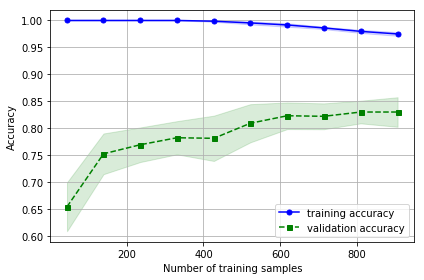

In [69]:
train_sizes, train_scores, test_scores =\
                cv.learning_curve(estimator=bestgb,
                               X=X,
                               y=Y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

## Voting scheme

In [79]:
#import sklearn.neighbors as N

#knc = N.KNeighborsClassifier()
#sorted(N.VALID_METRICS['brute'])

from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cvp=50

clf1 = GaussianNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cvp,n_jobs=-1)  # If cvp is integer, by default is Stratifyed 
clf.fit(X, Y)
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, Y, cv=cvp, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))

Best Params fo Knn= {'n_neighbors': 11, 'weights': 'distance'} Accuracy= 0.7227619047619048
Accuracy: 0.282 [Naive Bayes]
Accuracy: 0.723 [Knn (3)]
Accuracy: 0.746 [Dec. Tree]


In [80]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, Y, cv=cvp, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))

Accuracy: 0.740 [Majority Voting]


In [81]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[1,5,10])
scores = cross_val_score(eclf, X, Y, cv=cvp, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

Accuracy: 0.748 [Weighted Voting]


In [94]:
bestvc = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[1,5,10])

## Comparison of the best models

In [95]:
print('Bagging:        %0.3f' %  (bestbg.fit(X_train, y_train).score(X_test,y_test),))
print('Random Forests: %0.3f' %  (bestrf.fit(X_train, y_train).score(X_test,y_test),))
print('Extra Trees:    %0.3f' %  (bestet.fit(X_train, y_train).score(X_test,y_test),))
print('AdaBoost:       %0.3f' %  (bestab.fit(X_train, y_train).score(X_test,y_test),))
print('AdaBoost (RF):  %0.3f' % (bestab2.fit(X_train, y_train).score(X_test,y_test),))
print('Gradient Boost: %0.3f' %  (bestgb.fit(X_train, y_train).score(X_test,y_test),))
print('Voting Scheme:  %0.3f' %  (bestvc.fit(X_train, y_train).score(X_test,y_test),))

Bagging:        0.854
Random Forests: 0.868
Extra Trees:    0.838
AdaBoost:       0.669
AdaBoost (RF):  0.844
Gradient Boost: 0.851
Voting Scheme:  0.772
